# Adult-PMR3508

## Gustavo Lopes Oliveira
### 10335490 - Hash 52

**Objetivo:** Criação de quatro classificadores baseados em diferentes algoritmos de treinamento supervisionado que a partir das features disponíveis no dataset **Adult** que sejam capazes de classificar se o target *income* é **<=50k** ou **>50k**. Além disso, será realizada a comparação entre os resultados obtidos para os diferentes classificadores


## 1. Preparação dos dados

Inicialmente, será feita a importação das bibliotecas necessárias:
* **sklearn:** Biblioteca de aprendizado de máquinas open-source.
* **numpy:** Biblioteca focada na utilização de arrays multidimensionais e matrizes, além de inúmeras funções matemáticas.
* **pandas:** Biblioteca utilizada para manipulação e análise de dados.
* **seaborn:** Biblioteca com ferramentas para visualização de dados.
* **matplotlib:** Biblioteca com ferramentas para visualização de dados.

In [73]:
import sklearn
import numpy as np
import pandas
import seaborn as sns
import matplotlib as m
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

A partir da análise desenvolvida na primeira tarefa relativa ao dataset **Adult** e também pela observação dos outros notebooks publicados no Kaggle, opta-se por utilizar todas as variáveis numéricas e realizar o processo de one-hot encoding sobre todas as variáveis categóricas com o intuito de maximizar a acurácia dos estimadores.

Remove-se a feature *education*, uma vez que esta está correlacionada com a feature *education.num*. A feature *native.country* será desconsiderada uma vez que iria acrescer a quantidade de features após o processo de one hot encoding, sendo que sua utilidade no processo de classificação depende de uma análise mais profunda.



In [35]:
data = pandas.read_csv('data/train_data.csv')
y_train = data['income']
data_train = data.drop(columns = ['Id','education','native.country','income'])
num = data_train.select_dtypes(include = ['int64','float64']).columns
rs = RobustScaler()
data_train[num] = rs.fit_transform(data_train[num].values)
data_train.head()
n_samples = len(data_train.index)

In [36]:
cat = data_train.select_dtypes(include = 'object').columns
# OneHotEncoder
data_train = pandas.get_dummies(data_train, prefix=cat, columns = cat, drop_first=True)
data_train.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,-0.15,0.223346,0.000000,0.0,0.0,0.8,0,0,0,1,...,0,0,1,0,0,0,0,0,1,1
1,1.05,1.104837,-1.333333,0.0,0.0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
2,-0.60,-0.270468,0.000000,0.0,0.0,0.4,0,0,0,1,...,1,0,0,0,0,0,0,0,1,1
3,-0.65,-0.330683,0.000000,0.0,0.0,0.0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,1.00,0.675373,-0.333333,5178.0,0.0,4.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


## 2. Classificadores selecionados

Para o desenvolvimento de classificadores, serão utilizados os seguintes métodos:
* **Árvore de decisão**
* **Floresta aleatória**
* **Classificador de vetor suporte**
* **Classificador de redeneural (MLP)**

O método de otimização por busca randomizada e cross-validation RandomizedSearchCV será utilizado para encontrar o melhor conjunto de hiperparâmetros para os classificadores treinados.

### 2.1 Árvore de decisão

O método de árvore de decisão se baseia em uma sequência de decisões baseadas em um limiar numérico de cada feature. Caso o valor apresentado pela amostra seja menor que o limiar, o processo de decisão segue por um caminho, caso seja maior, por outro. Os hiperparâmetros que serão otimizados são a profundidade máxima de ramificações a partir de um ponto inicial (*max_depth*) e a quantidade máxima de features (*max_features*) que devem ser utilizadas para o desenvolvimento do limiar de uma decisão.

Ambos parâmetros estejam relacionados com a complexidade da árvore de decisões. O parâmetro *max_depth* tem grande influencia sobre a generalidade da árvore, uma vez que está relacionado com a quantidade máxima de subdivisões que serão realizadas no espaço. O parâmetro *max_features* está relacionado com a quantidade de informação utilizada para a realização de cada split na árvore de decisões, podendo, quando em conjunto com uma grande quantidade de ramificações, resultar em overfitting no dataset de treino. 

A grande desvantagem do algoritmo de árvore de decisão é a sua suscetibilidade à overfitting, uma vez que permite a criação de regiões de classificação muito específicas para o dataset de treinamento.

In [37]:
from sklearn.tree import DecisionTreeClassifier
clf_DTC = DecisionTreeClassifier()
parameters_DTC = {
    'max_features': np.arange(1,45), # Parâmetros que serão variados
    'max_depth': np.arange(5,200)}
random_search_DTC = RandomizedSearchCV(
    verbose=3, 
    param_distributions = parameters_DTC,
    estimator=clf_DTC,
    n_iter = 300,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
                                    )
DTC = random_search_DTC.fit(data_train, y_train) # Treinamento dos classificadores com os dados de teste


Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   36.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   59.2s
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  1.9min finished


Text(377.05825000000004, 0.5, 'Accuracy')

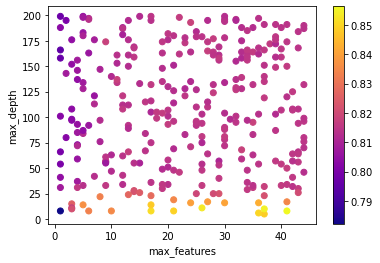

In [166]:
DF_DTC = pandas.DataFrame(random_search_DTC.cv_results_)
fig = plt.figure()
ax = plt.axes()
x_DTC = DF_DTC['param_max_features']
y_DTC = DF_DTC['param_max_depth']
z_DTC = DF_DTC['mean_test_score']
ax.scatter(x_DTC, y_DTC, c=z_DTC, cmap = 'plasma')
norm = m.colors.Normalize(vmin=z_DTC.min(), vmax=z_DTC.max(), clip=False)
mapp = m.cm.ScalarMappable(norm=norm, cmap= 'plasma')
plt.xlabel("max_features")
plt.ylabel("max_depth")
plt.colorbar(mapp)
cbar.ax.set_ylabel('Accuracy', rotation=-90, va="bottom")

In [167]:
y_DTC = random_search_DTC.predict(data_train)
print('Parâmetros do DTC com maior acurácia',random_search_DTC.best_params_ )
print('Acurácia do melhor DTC no CV:', random_search_DTC.best_score_ ) 
print('Acurácia do melhor DTC na base de treino:', accuracy_score(y_DTC,y_train))

Parâmetros do DTC com maior acurácia {'max_features': 41, 'max_depth': 8}
Acurácia do melhor DTC no CV: 0.8562653562653562
Acurácia do melhor DTC na base de treino: 0.8604422604422605


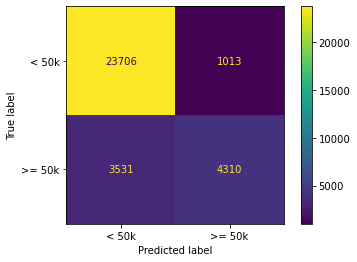

In [39]:
ConfusionMatrixDisplay(confusion_matrix(y_train,y_DTC),display_labels = ['< 50k','>= 50k']).plot()

In [40]:
print(classification_report(y_train, y_DTC))

              precision    recall  f1-score   support

       <=50K       0.87      0.96      0.91     24719
        >50K       0.81      0.55      0.65      7841

    accuracy                           0.86     32560
   macro avg       0.84      0.75      0.78     32560
weighted avg       0.86      0.86      0.85     32560



### 2.2 Floresta aleatória

O método de floresta aleatória se baseia na geração de árvores de decisão treinadas para fragmentos distintos do dataset e na utilização do método de bagging para a criação de um estimador melhor a partir de uma grande quantidade de estimadores de menor acurácia. Os hiperparâmetros que serão otimizados são a quantidade de árvores de decisão utilizadas (*n_estimators*) e a quatnidade máxima de ramificações a partir de um ponto inicial das árvores de decisão geradas (*max_depth*).

O aumento de *n_estimators* tende a ser benéfico para a acurácia do classificador, ao custo do tempo de treinamento necessário. O parâmetro *max_depth* deve ser controlado com o intuito de garantir a acurácia e evitar o overfitting das árvores de decisão treinadas.

Este algoritmo contorna à  tendência de overfitting das árvores de otimização por meio do treinamento de árvores de decisão para diferentes subconjuntos do dataset gerados aleatoriamente, assumindo como melhor estimativa para uma amostra a estimativa realizada pela maioria das árvores de decisão geradas, o que reduz a variância sem aumentar o viés do classificador.

In [41]:
from sklearn.ensemble import RandomForestClassifier
clf_RFC = RandomForestClassifier()
parameters_RFC = {
    'n_estimators': np.arange(50,300), # Parâmetros que serão variados
    'max_depth': np.arange(5,40)}
random_search_RFC = RandomizedSearchCV(
    verbose=3, 
    param_distributions = parameters_RFC,
    estimator=clf_RFC,
    n_iter = 50,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
                                    )
RFC = random_search_RFC.fit(data_train, y_train) # Treinamento dos classificadores com os dados de teste

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 10.1min finished


Text(0, 0.5, 'Accuracy')

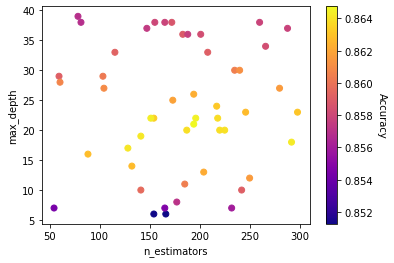

In [165]:
DF_RFC = pandas.DataFrame(random_search_RFC.cv_results_)
fig = plt.figure()
ax = plt.axes()
x_RFC = DF_RFC['param_n_estimators']
y_RFC = DF_RFC['param_max_depth']
z_RFC = DF_RFC['mean_test_score']
ax.scatter(x_RFC, y_RFC, c=z_RFC, cmap = 'plasma')
norm = m.colors.Normalize(vmin=z_RFC.min(), vmax=z_RFC.max(), clip=False)
mapp = m.cm.ScalarMappable(norm=norm, cmap= 'plasma')
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
cbar = plt.colorbar(mapp)
cbar.ax.set_ylabel('Accuracy', rotation=-90, va="bottom")

In [132]:
y_RFC = random_search_RFC.predict(data_train)
print('Parâmetros do RFC com maior acurácia',random_search_RFC.best_params_ )
print('Acurácia do melhor RFC no CV:', random_search_RFC.best_score_ ) 
print('Acurácia do melhor RFC na base de treino:', accuracy_score(y_RFC,y_train))

Parâmetros do RFC com maior acurácia {'n_estimators': 194, 'max_depth': 21}
Acurácia do melhor RFC no CV: 0.8647420147420147
Acurácia do melhor RFC na base de treino: 0.9373771498771499


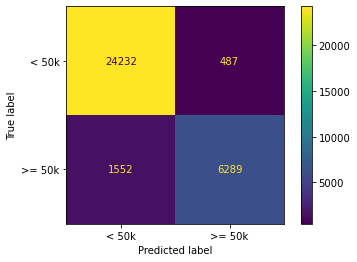

In [43]:
ConfusionMatrixDisplay(confusion_matrix(y_train, y_RFC),display_labels = ['< 50k','>= 50k']).plot()

In [44]:
print(classification_report(y_train, y_RFC))

              precision    recall  f1-score   support

       <=50K       0.94      0.98      0.96     24719
        >50K       0.93      0.80      0.86      7841

    accuracy                           0.94     32560
   macro avg       0.93      0.89      0.91     32560
weighted avg       0.94      0.94      0.94     32560



### 2.3 Vetor de Suporte

O método de vetor suporte se baseia na busca pelo hiperplano que separa o dataset entre uma classe e outra. Como forma de fugir do caráter linear do método empregado, é possível a utilização de kernels responsáveis pelo mapeamento do dataset segundo determinadas funções. Os hiperparâmetros que serão otimizados serão o parâmetro de regularização (*C*) e o coeficiente do Kernel (*gamma*).

O parâmetro *C* busca controlar a proporção entre a suavidade do hiperplano e seu fitting com os dados de treino por meio da penalização do erro de classificação. O parâmetro *gamma* atua diretamente no kernel, de forma que sua variação está relacionada com a capacidade de se formarem regiões com limites curvos e complexos.

In [45]:
from sklearn.svm import SVC
clf_SVC = SVC(probability=False)
parameters_SVC = {
    'C': [0.01,0.1,1,2,5,10],
    'gamma': ['auto','scale']} # Parâmetros que serão variados
random_search_SVC = RandomizedSearchCV(
    verbose=3, 
    param_distributions = parameters_SVC,
    estimator=clf_SVC,
    n_iter = 30,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
                                    )
SVC = random_search_SVC.fit(data_train, y_train) # Treinamento dos classificadores com os dados de teste

C:\Users\irong\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 12 is smaller than n_iter=30. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 14.9min finished


Text(0, 0.5, 'Accuracy')

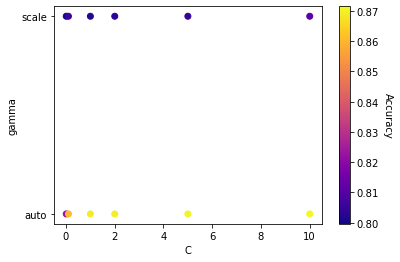

In [170]:
DF_SVC = pandas.DataFrame(random_search_SVC.cv_results_)
fig = plt.figure()
ax = plt.axes()
x_SVC = DF_SVC['param_C']
y_SVC = DF_SVC['param_gamma']
z_SVC = DF_SVC['mean_test_score']
ax.scatter(x_SVC, y_SVC, c=z_SVC, cmap = 'plasma')
norm = m.colors.Normalize(vmin=z_SVC.min(), vmax=z_SVC.max(), clip=False)
mapp = m.cm.ScalarMappable(norm=norm, cmap= 'plasma')
plt.xlabel("C")
plt.ylabel("gamma")
cbar = plt.colorbar(mapp)
cbar.ax.set_ylabel('Accuracy', rotation=-90, va="bottom")

In [171]:
y_SVC = random_search_SVC.predict(data_train)
print('Parâmetros de SVC com maior acurácia',random_search_SVC.best_params_ )
print('Acurácia do melhor SVC no CV:', random_search_SVC.best_score_ ) 
print('Acurácia do melhor SVC na base de treino:', accuracy_score(y_SVC,y_train))

Parâmetros de SVC com maior acurácia {'gamma': 'auto', 'C': 10}
Acurácia do melhor SVC no CV: 0.8714987714987714
Acurácia do melhor SVC na base de treino: 0.8764742014742015


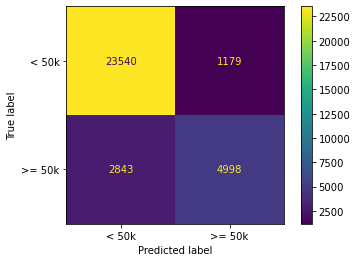

In [172]:
ConfusionMatrixDisplay(confusion_matrix(y_train,y_SVC),display_labels = ['< 50k','>= 50k']).plot()

In [173]:
print(classification_report(y_train, y_SVC))

              precision    recall  f1-score   support

       <=50K       0.89      0.95      0.92     24719
        >50K       0.81      0.64      0.71      7841

    accuracy                           0.88     32560
   macro avg       0.85      0.79      0.82     32560
weighted avg       0.87      0.88      0.87     32560



### 2.4 Rede Neural

O método de rede neural MLP (Multicamadas de perceptrons) se baseia na utilização de diversas camadas com multiplos perceptrons (modelos matemáticos do funcionamento de neurônios humanos) para classificar as amostras do dataset. Os hiperparâmetros que serão otimizados serão a quantidade de perceptrons e de camadas ocultas (*hidden_layer_sizes*), a penalização da perda tipo L2 (*alpha*) e o tipo de taxa de aprendizado (*learning_rate*).

Cada elemento do parâmetro *hidden_layer_sizes* indica a quantidade de perceptrons na i-ésima camada da rede neural, de modo que a quantidade de elementos na lista denota a quantidade de parâmetros da rede neural. Ambos os parâmetros estão relacionados com a quantidade de informação e o nível de abstração das camadas, de modo que devem ser regulados como forma de atrelar acurácia e tempo de treinamento. O parâmetros *alpha* serve como parâmetro de regularização do sistema, estando relacionada com o nível de minimização dos coeficientes do modelo treinado como forma de limitar a possibilidade de overfitting.  O parâmetro *learning_rate* indica se a taxa de aprendizado deve ser constante ou adaptativa.


In [168]:
from sklearn.neural_network import MLPClassifier
clf_MLPC = MLPClassifier()
parameters_MLPC = {
    'hidden_layer_sizes': [(2 ** (i), 2 ** (i+1)) for i in np.arange(2, 6)],
    'alpha': [0.000001,0.00001,0.0001,0.001,0.01,0.1],
    'learning_rate': ['constant','adaptive']}
random_search_MLPC = RandomizedSearchCV(
    verbose=3, 
    param_distributions = parameters_MLPC,
    estimator=clf_MLPC,
    n_iter = 30,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
                                    )
MLPC = random_search_MLPC.fit(data_train, y_train) # Treinamento dos classificadores com os dados de teste

C:\Users\irong\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 48 is smaller than n_iter=100. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  8.4min finished


Text(0, 0.5, 'Accuracy')

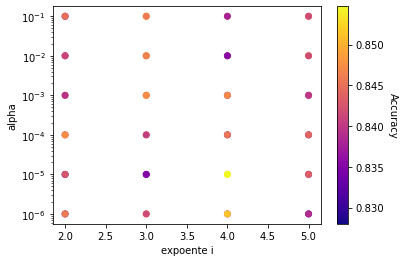

In [219]:
import math
DF_MLPC = pandas.DataFrame(random_search_MLPC.cv_results_)
fig = plt.figure()
ax = plt.axes()
x_MLPC = DF_MLPC['param_alpha']
y_MLPC = DF_MLPC['param_hidden_layer_sizes'].values.tolist()
z_MLPC = DF_MLPC['mean_test_score']
p = []
for i in range(len(z_MLPC)):
    sample = y_MLPC[i]
    p.append(math.log(sample[0],2))
ax.set_yscale('log')
ax.scatter(p, x_MLPC, c=z_MLPC, cmap = 'plasma')
norm = m.colors.Normalize(vmin=z_MLPC.min(), vmax=z_MLPC.max(), clip=False)
mapp = m.cm.ScalarMappable(norm=norm, cmap= 'plasma')
plt.xlabel("expoente i")
plt.ylabel("alpha")
cbar = plt.colorbar(mapp)
cbar.ax.set_ylabel('Accuracy', rotation=-90, va="bottom")

In [179]:
y_MLPC = random_search_MLPC.predict(data_train)
print('Parâmetros de MLPC com maior acurácia',random_search_MLPC.best_params_ )
print('Acurácia do melhor MLPC no CV:', random_search_MLPC.best_score_ ) 
print('Acurácia do melhor MLPC na base de treino:', accuracy_score(y_MLPC,y_train))

Parâmetros de MLPC com maior acurácia {'learning_rate': 'adaptive', 'hidden_layer_sizes': (16, 32), 'alpha': 1e-05}
Acurácia do melhor MLPC no CV: 0.8546990171990172
Acurácia do melhor MLPC na base de treino: 0.8519963144963145


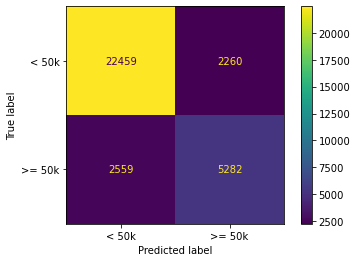

In [180]:
ConfusionMatrixDisplay(confusion_matrix(y_train,y_MLPC),display_labels = ['< 50k','>= 50k']).plot()

In [181]:
print(classification_report(y_train, y_MLPC))

              precision    recall  f1-score   support

       <=50K       0.90      0.91      0.90     24719
        >50K       0.70      0.67      0.69      7841

    accuracy                           0.85     32560
   macro avg       0.80      0.79      0.79     32560
weighted avg       0.85      0.85      0.85     32560



In [ ]:
print(accuracy_score(clf_MLPC.predict(data_test),y_test))

## 3. Comparação dos classificadores

* O algoritmo DTC mostrou maior acurácia para situações em que o parâmetros *max_depth* era menor, com o parâmetros*max_features* relativamente elevado. Como a melhor árvore tem *max_depth* de 8, estando distante do limite de 200 estipulado, pode se afirmar que a tendência de overfitting deste classificador é pequena quando comparado à outros classificadores treinados e avaliados.
* Como esperado, o algoritmo RFC permite o desenvolvimento de um estimador com maior acurácia (2o melhor) do que o algorítmo DTC, tendo, ainda, uma menor suscetibilidade a overfitting. No entanto, o tempo de treinamento do RFC é significativamente maior, uma vez que depende do treinamento de diversas árvores de decisão. A elevação do parâmetro *n_estimators* é interessante para o aumento da acurácia, porém seu efeito é mais pronunciado para o início do intervalo, de modo que a sua redução poderia melhorar drasticamente o tempo de execução do programa sem comprometer significantemente a acurácia do classificador. Para o parâmetro *max_depth* observa-se que a maximização da acurácia ocorre para valores entre 20 e 25.
* O algoritmo SVC possui um tempo de treinamento muito elevado, permitindo, por meio do uso do kernel "rbf" (*radial basis function*) a construção do estimador de maior acurácia dentre os 4 estimadores testados. A otimização da variável *C* se mostra essencial para a obtenção de um classificador acurado. A variável *gamma* no modo *auto* traz melhores resultados do que o que foi observado para os modelos criados no modo *scale*, que leva em consideração a variância do dataset.
* O algoritmo MLPC foi o pior colocado entre os classificadores. Talvez devido à falta de experiência do autor com a otimização de seus hiperparâmetros ou pela inadequação deste tipo de algoritmo para o dataset trabalhado, a acurácia deste algoritmo foi inferior até mesmo àquela obtida para o classificador treinado pelo método de árvore de decisão. Mesmo com a visualização do gráfico, a análise do efeito dos parâmetros sobre a acurácia do classificador é complexa.

## 4. Predição dos dados de teste

O classificador que obteve a maior acurácia foi o SVC, com 87,1% no processo de cross-validation. Assim, esse classificador será utiliza para realizar a predição da variável *target* para os dados de teste.

In [227]:
data_test_raw = pandas.read_csv('data/test_data.csv')
id_test = data_test_raw['Id']
data_test = data_test_raw.drop(columns = ['Id','education','native.country'])
num = data_test.select_dtypes(include = ['int64','float64']).columns
rs = RobustScaler()
data_test[num] = rs.fit_transform(data_test[num].values)
cat = data_test.select_dtypes(include = 'object').columns
data_test = pandas.get_dummies(data_test, prefix=cat, columns = cat, drop_first=True)
data_test.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,-0.60,-0.470408,1.000000,0.0,0.0,0.8,0,0,0,1,...,1,0,0,0,0,0,0,0,1,1
1,1.35,-0.207882,1.000000,0.0,0.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,-0.30,-0.638579,1.333333,0.0,0.0,0.0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
3,0.40,0.092822,-0.333333,0.0,0.0,0.0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,1
4,1.35,2.547277,1.000000,0.0,0.0,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [235]:
y_predict = random_search_SVC.predict(data_test)
data_test_raw['Id'] = id_test
data_test_raw['income'] = y_predict
prediction = data_test_raw[['Id','income']].to_csv("submission.csv", index = False)

Após submissão no Kaggle, obteve-se acurácia de 87,38%, pouquíssimo inferior à acurácia obtida para a base de treino, o que indica que o modelo não sofreu efeito de overfitting significativo.